In [1]:
from __future__ import print_function, division, unicode_literals, absolute_import

import sys
import os
import numpy as np

%matplotlib notebook
from IPython.display import display
#import seaborn as sns   # uncomment this line to activate seaborn settings.

from abipy import abilab

In [2]:
sigres = abilab.abiopen('/Users/gmatteo/git_repos/abipy/abipy/data/refs/si_g0w0/si_g0w0ppm_nband30_SIGRES.nc')

monkhorst_pack_folding variables has not been written to netcdf file.
Received [-2147483647 -2147483647 -2147483647]
Set mpdivs to None, this could create problems in post-processing tools.
If needed, use python netcdf to change the value of `monkhorst_pack_folding`


In [3]:
print(sigres)

================================= File Info =================================
Name: si_g0w0ppm_nband30_SIGRES.nc
Directory: /Users/gmatteo/git_repos/abipy/abipy/data/refs/si_g0w0
Size: 133.11 kb
Access Time: Sat May  6 14:20:25 2017
Modification Time: Wed May  3 20:46:18 2017
Change Time: Wed May  3 20:46:18 2017

============================== Kohn-Sham bands ==============================
Structure Summary
Lattice
    abc : 3.8669746352064829 3.8669746352113457 3.8669746351893135
 angles : 60.000000000188479 60.000000000146869 60.000000000400874
 volume : 40.888292275933381
      A : 3.3488982698838332 0.0 1.9334873175946568
      B : 1.1162994232769716 3.157371568197199 1.9334873175946568
      C : 0.0 0.0 3.8669746351893135
PeriodicSite: Si (0.0000, 0.0000, 0.0000) [0.0000, 0.0000, 0.0000]
PeriodicSite: Si (1.1163, 0.7893, 1.9335) [0.2500, 0.2500, 0.2500]

Number of electrons: 8.0, Fermi level: 5.959 [eV]
nsppol: 1, nkpt: 6, mband: 30, nspinor: 1, nspden: 1
smearing scheme: none, t

In [4]:
df = sigres.to_dataframe()

In [6]:
df.head()

,spin,kpoint,band,e0,qpe,qpe_diago,vxcme,sigxme,sigcmee0,vUme,ze0,qpeme0,ecutwfn,ecuteps,ecutsigx,scr_nband,sigma_nband,gwcalctyp,scissor_ene,nkibz
0,0,"[-0.250, -0.250, 0.000], weight=0.000",0,-5.171825,(-5.0139986014-0.00492367877409j),-4.897051,-10.446136,-17.067165,(6.89580328995-0.00857208100161j),0.0,(0.574385469895+0j),(0.157826335594-0.00492367877409j),5.9143816051597975,3.696488503216653,5.914381605159807,25,30,0,0.0,6
1,0,"[-0.250, -0.250, 0.000], weight=0.000",1,2.078901,(1.84501379841+0.00128163072487j),1.765815,-11.020524,-14.196715,(2.86310621268+0.00171561484934j),0.0,(0.747038722218+0j),(-0.233887314895+0.00128163072487j),5.9143816051597975,3.696488503216653,5.914381605159807,25,30,0,0.0,6
2,0,"[-0.250, -0.250, 0.000], weight=0.000",2,3.737441,(3.51252840103+1.35078691855e-05j),3.442844,-10.604980,-13.053781,(2.15420321781+1.76930144424e-05j),0.0,(0.763457760663+0j),(-0.224912798408+1.35078691855e-05j),5.9143816051597975,3.696488503216653,5.914381605159807,25,30,0,0.0,6
3,0,"[-0.250, -0.250, 0.000], weight=0.000",3,3.737441,(3.51252842822+1.35078691855e-05j),3.442844,-10.604980,-13.053781,(2.15420321781+1.76930144424e-05j),0.0,(0.763457760663+0j),(-0.224912771292+1.35078691855e-05j),5.9143816051597975,3.696488503216653,5.914381605159807,25,30,0,0.0,6
4,0,"[-0.250, -0.250, 0.000], weight=0.000",4,6.689203,(7.0244834507-2.85662525254e-07j),7.117402,-9.349620,-5.272095,(-3.64932530643-3.6483045617e-07j),0.0,(0.783000762199+0j),(0.335280297907-2.85662525254e-07j),5.9143816051597975,3.696488503216653,5.914381605159807,25,30,0,0.0,6


<IPython.core.display.Javascript object>


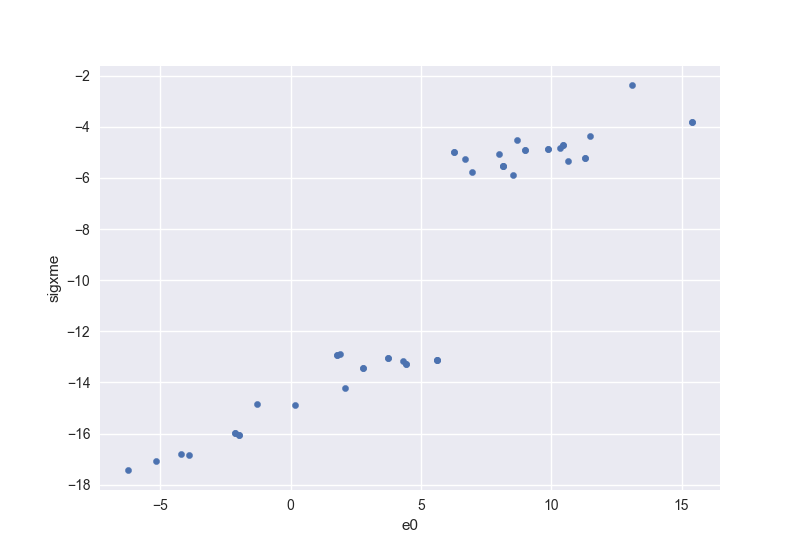

In [15]:
df.plot.scatter(x="e0", y="sigxme")

In [12]:
import df_widgets.seabornw as snw
snw.pairplot(df)

<function df_widgets.seabornw.pairplot.<locals>.sns_pairplot>

In [13]:
snw.lmplot(df)

<function df_widgets.seabornw.lmplot.<locals>.sns_lmplot>

In [ ]:
fig = sigres.plot_qps_vs_e0()

In [ ]:
fig = sigres.plot_spectral_functions(spin=0, kpoint=[0, 0, 0], bands=0)

In [ ]:
#fig = sigres.plot_ksbands_with_qpmarkers(qpattr='qpeme0', fact=100)

In [ ]:
r = sigres.interpolate(ks_ebands_kpath=None, ks_ebands_kmesh=None); print(r.interpolator)

In [ ]:
fig = r.qp_ebands_kpath.plot()

In [ ]:

if r.ks_ebands_kpath is not None:
    plotter = abilab.ElectronBandsPlotter()
    plotter.add_ebands("KS", r.ks_ebands_kpath) # dos=r.ks_ebands_kmesh.get_edos())
    plotter.add_ebands("GW (interpolated)", r.qp_ebands_kpath) # dos=r.qp_ebands_kmesh.get_edos()))
    plotter.ipw_select_plot()